# CSCE 5214 Section 002 - Software Development For Artificial Intelligence

## Lung Cancer Prediction

In [1]:
#import statements
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
import plotly.graph_objs as go
import keras
import plotly.offline as py
import xgboost as xgb
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot, init_notebook_mode
py.init_notebook_mode(connected = True)
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import BatchNormalization
from keras.backend import dropout
from keras.models import Model, load_model, Sequential
from tensorflow.keras.models import Model
from keras.layers import Input,Dense,Dropout
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.cluster import KMeans


In [2]:

surveyDataFrame = pd.read_csv('C:/Users/vikram reddy/Downloads/LungCancerSurvey.csv')
surveyDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Mapping Data

In [3]:
surveyDataFrame["LUNG_CANCER"] = surveyDataFrame.LUNG_CANCER.map({"YES": 1, "NO": 0})

In [4]:
dataColumns = surveyDataFrame.columns

In [5]:
dataFrame = pd.get_dummies(surveyDataFrame[dataColumns])

In [6]:
dataFrame

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,0,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,0,1


In [7]:
minMaxScalar = MinMaxScaler()
dataFrame_ns = dataFrame[['AGE']]
dataFrame.drop(['AGE'],axis=1,inplace=True)

In [8]:
dataFrame_ns = dataFrame_ns.values
dataFrame_ns = minMaxScalar.fit_transform(dataFrame_ns)
dataFrame_ns = pd.DataFrame(dataFrame_ns,columns = ['AGE'])
dataFrame = pd.concat([dataFrame_ns,dataFrame],axis=1)
dataFrame.head(2)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1


In [9]:
dataFrame

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,0.575758,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,0.636364,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,0.636364,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.530303,1,1,1,2,2,2,1,1,2,2,2,2,1,1,1,0
305,0.742424,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0,1
306,0.560606,2,1,1,1,1,1,2,2,2,2,1,1,2,1,0,1
307,0.696970,2,1,2,1,1,2,2,1,2,2,2,1,2,1,0,1


In [10]:
lungCancerDataFrame, modelDataFrame = dataFrame["LUNG_CANCER"], dataFrame.drop(['LUNG_CANCER'], axis=1)

In [11]:
lungCancerDataFrame

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

# Survey Data Plots

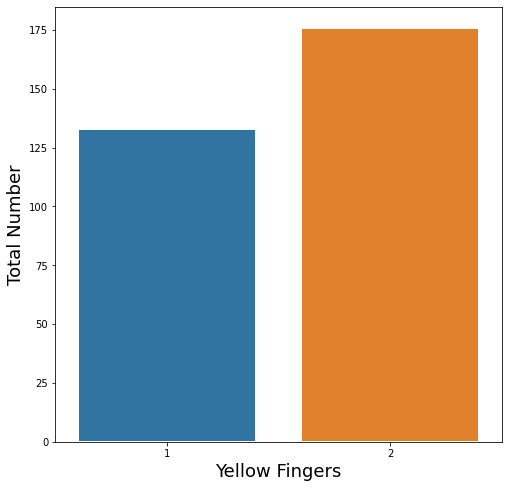

In [12]:
plt.rcParams['figure.figsize'] = (8, 8)
ax = sns.countplot(data = dataFrame, x ='YELLOW_FINGERS', alpha = 1, linewidth=2, edgecolor= 'white')
ax.set_ylabel('Total Number', fontsize = 18)
ax.set_xlabel('Yellow Fingers', fontsize = 18)
plt.show()

In [13]:
def pie_plot(count, colors, title):
    labels=count.index
    values=count.values
    chart = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.4,
                   showlegend=True,
                   marker=dict(colors=colors,line=dict(color='#FF0000',width=1),
                  )
              )
    return chart

In [14]:
maleFemale = surveyDataFrame.groupby(surveyDataFrame['GENDER'])['LUNG_CANCER'].sum()

py.iplot([pie_plot(maleFemale, ['green', 'cyan'], 'Age Rating')])

In [15]:
chestPain = surveyDataFrame.groupby(surveyDataFrame['CHEST PAIN'])['LUNG_CANCER'].sum()

py.iplot([pie_plot(chestPain, ['blue', 'green'], 'Age Rating')])

In [16]:
wheezing = surveyDataFrame.groupby(surveyDataFrame['WHEEZING'])['LUNG_CANCER'].sum()


py.iplot([pie_plot(wheezing, ['red', 'blue'], 'Age Rating')])

# Model

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(modelDataFrame, lungCancerDataFrame, test_size=0.20, shuffle=True)

In [18]:
print(f"xTrain size: {xTrain.shape}")
print(f"xTest size: {xTest.shape}")
print(f"yTrain zize: {yTrain.shape}")
print(f"yTest size: {yTest.shape}")
print(f"Number of classes {len(np.unique(yTrain))}")

xTrain size: (247, 16)
xTest size: (62, 16)
yTrain zize: (247,)
yTest size: (62,)
Number of classes 2


In [19]:
randomForestClassifier = RandomForestClassifier(n_estimators=300, n_jobs=-1)
randomForestClassifier.fit(xTrain, yTrain)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [20]:
print(f"Training dataset accuracy: {randomForestClassifier.score(xTrain, yTrain)}")
print(f"Testing dataset accuracy {randomForestClassifier.score(xTest, yTest)}")

Training dataset accuracy: 0.9959514170040485
Testing dataset accuracy 0.9032258064516129


In [21]:
pm = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,5,2)
    }

paramGridSr = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), param_grid = pm, 
                             scoring='accuracy', n_jobs=-1, cv=2)

paramGridSr.fit(xTrain, yTrain)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [22]:
paramGridSr.best_score_

0.89073564122738

In [23]:
newXGBModel = xgb.XGBClassifier(eval_metric='logloss', max_depth=list(paramGridSr.best_params_.values())[0]-1, 
                                      min_child_weight=list(paramGridSr.best_params_.values())[-1]+4)
newXGBModel.fit(xTrain, yTrain)
print(f'XGB Accuracy on Training dataset: {newXGBModel.score(xTrain, yTrain)}')
print(f'XGB Accuracy on Testing dataset: {newXGBModel.score(xTest[xTrain.columns], yTest)}')

XGB Accuracy on Training dataset: 0.9311740890688259
XGB Accuracy on Testing dataset: 0.9032258064516129


# Neural Network

In [24]:
xTrain.shape[0], xTrain.shape[1], yTrain.shape[0]

(247, 16, 247)

In [25]:
finalModel = Sequential()
finalModel.add(Dense(128, kernel_initializer = 'uniform', activation='relu', input_shape=(16,)))
finalModel.add(Dropout(0.3))
finalModel.add(Dense(256, kernel_initializer = 'uniform', activation='sigmoid'))
finalModel.add(Dropout(0.3))
finalModel.add(Dense(1, activation='relu'))
finalModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
finalModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,457
Trainable params: 35,457
Non-trainable params: 0
_________________________________________________________________


In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [28]:
def modelClassifier():
    mainClassifierBuild = Sequential()
    mainClassifierBuild.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = xTrain.shape[1]))
    mainClassifierBuild.add(Dropout(0.2))
    mainClassifierBuild.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
    mainClassifierBuild.add(Dropout(0.2))
    mainClassifierBuild.add(Dense(units = len(set(yTrain)), activation = 'softmax'))
    mainClassifierBuild.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return mainClassifierBuild

In [29]:
mainClassifierBuild = KerasClassifier(build_fn = modelClassifier, batch_size = 16, epochs = 50)

In [30]:
mainClassifierBuild.fit(xTrain, np_utils.to_categorical(yTrain), 
                            batch_size = 256, 
                            epochs = 50,
                            callbacks = [early_stop])

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6973 - accuracy: 0.3887
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6022 - accuracy: 0.8745
Epoch 3/50
1/1 [==============================] - 0s 17ms/step - loss: 0.5322 - accuracy: 0.8745
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 0.4644 - accuracy: 0.8745
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4076 - accuracy: 0.8745
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3650 - accuracy: 0.8745
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3507 - accuracy: 0.8745
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3448 - accuracy: 0.8745
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3582 - accuracy: 0.8745
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3729 - accuracy: 0.8745
Epoch 11/50
1/1 [==============

Epoch 28/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3304 - accuracy: 0.8745
Epoch 29/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3276 - accuracy: 0.8745
Epoch 30/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3287 - accuracy: 0.8745
Epoch 31/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3304 - accuracy: 0.8745
Epoch 32/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3307 - accuracy: 0.8745
Epoch 33/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3291 - accuracy: 0.8745
Epoch 34/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3301 - accuracy: 0.8745
Epoch 35/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3251 - accuracy: 0.8745
Epoch 36/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3278 - accuracy: 0.8745
Epoch 37/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3245 - accuracy: 0.8745
Epoch 38/50
1/1 [===

In [31]:
accValue = cross_val_score(estimator = mainClassifierBuild, X = xTest, y = yTest, cv = 3)

Epoch 1/50
3/3 [==============================] - 1s 11ms/step - loss: 0.6225 - accuracy: 0.8293
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4577 - accuracy: 0.8537
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.4111 - accuracy: 0.8537
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3959 - accuracy: 0.8537
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3942 - accuracy: 0.8537
Epoch 6/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3827 - accuracy: 0.8537
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3709 - accuracy: 0.8537
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3693 - accuracy: 0.8537
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3419 - accuracy: 0.8537
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.3503 - accuracy: 0.8537
Epoch 11/50
3/3 [=====================

In [32]:
meanValue = accValue.mean()
varianceValue = accValue.std()
print(f"Mean Accuracy : {meanValue}")
print(f"Variance Accuracy : {varianceValue}" )

Mean Accuracy : 0.8071428736050924
Variance Accuracy : 0.036004118757625866


In [33]:
history = finalModel.fit(xTrain, yTrain, batch_size = 256, epochs = 50, validation_data = (xTest, yTest),
                            callbacks = [early_stop])

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.6088 - accuracy: 0.6680 - val_loss: 0.3817 - val_accuracy: 0.8710
Epoch 2/50
1/1 [==============================] - 0s 82ms/step - loss: 1.6131 - accuracy: 0.6883 - val_loss: 0.4756 - val_accuracy: 0.8710
Epoch 3/50
1/1 [==============================] - 0s 81ms/step - loss: 0.9986 - accuracy: 0.8259 - val_loss: 1.9676 - val_accuracy: 0.8710
Epoch 4/50
1/1 [==============================] - 0s 90ms/step - loss: 1.4248 - accuracy: 0.8016 - val_loss: 1.9676 - val_accuracy: 0.8710
Epoch 5/50
1/1 [==============================] - 0s 85ms/step - loss: 1.6289 - accuracy: 0.8340 - val_loss: 1.9676 - val_accuracy: 0.8710
Epoch 6/50
1/1 [==============================] - 0s 87ms/step - loss: 1.4454 - accuracy: 0.8462 - val_loss: 1.9676 - val_accuracy: 0.8710
Epoch 7/50
1/1 [==============================] - 0s 90ms/step - loss: 1.5972 - accuracy: 0.8543 - val_loss: 1.9676 - val_accuracy: 0.8710
Epoch 8/50
1/1 [=============

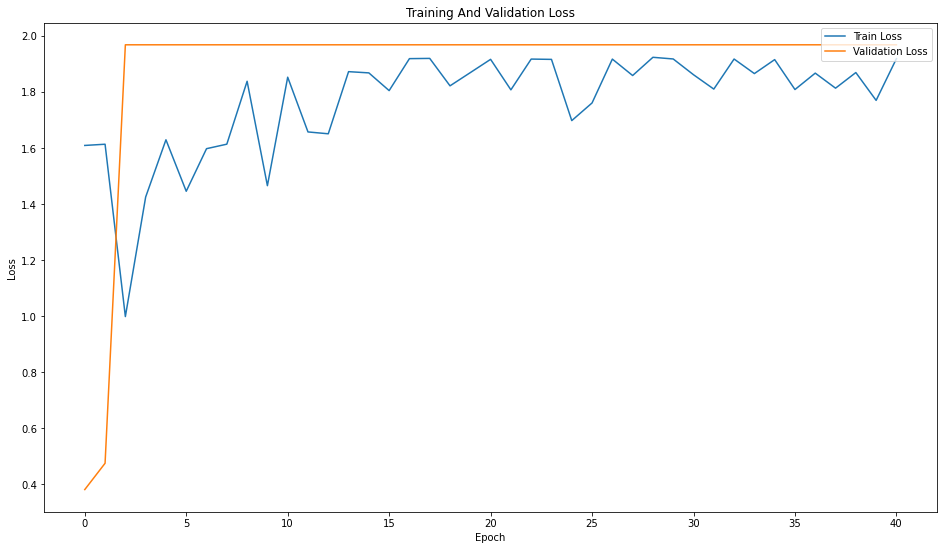

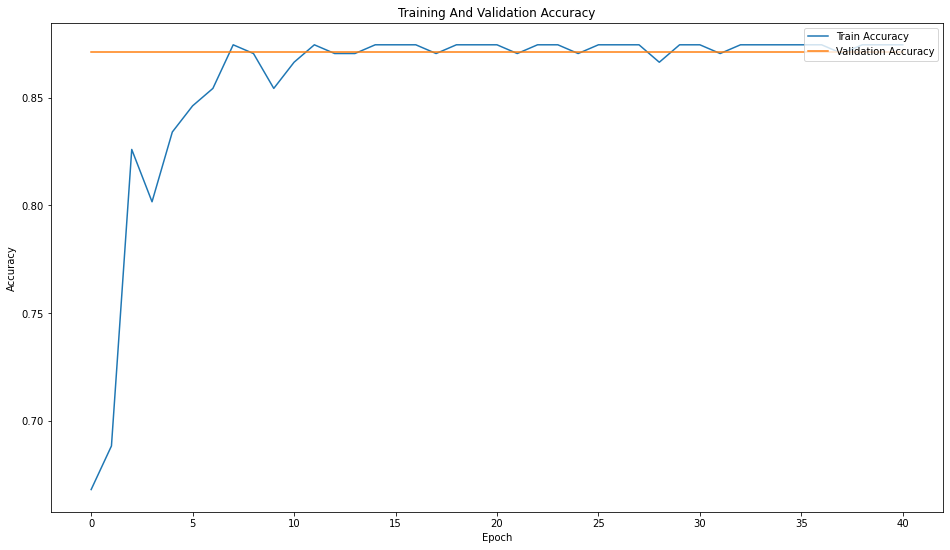

In [34]:
plt.rcParams["figure.figsize"] = [16,9]
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()
